# Applied Machine Learning: Train Disruption Classification

**Part B - Data Preparation, Modeling, and Evaluation**

---

## 1. Data Preparation


### 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

### 2. Load Dataset

In [103]:
#Load Dataset
df = pd.read_csv("railway.csv")

# Dataset dimensions
print("Dataset shape:", df.shape)

# View first few rows
df.head()

Dataset shape: (31653, 18)


,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


### 3. Initial Exploration

In [104]:
# View last few rows
df.tail()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
31648,1304623d-b8b7-4999-8e9c,2024-04-30,18:42:58,Online,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:00:00,20:30:00,20:30:00,On Time,NaN,No
31649,7da22246-f480-417c-bc2f,2024-04-30,18:46:10,Online,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,20:15:00,21:35:00,21:35:00,On Time,NaN,No
31650,add9debf-46c1-4c75-b52d,2024-04-30,18:56:41,Station,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,2024-04-30,20:15:00,20:45:00,20:45:00,On Time,NaN,No
31651,b92b047c-21fd-4859-966a,2024-04-30,19:51:47,Station,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,2024-04-30,21:15:00,22:35:00,22:35:00,On Time,NaN,No
31652,1d5d89a2-bde5-410f-8f91,2024-04-30,20:05:39,Station,Credit Card,Adult,Standard,Off-Peak,3,Liverpool Lime Street,Manchester Piccadilly,2024-04-30,21:30:00,22:00:00,22:00:00,On Time,NaN,No


In [105]:
# Info on data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31653 entries, 0 to 31652
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction ID       31653 non-null  object
 1   Date of Purchase     31653 non-null  object
 2   Time of Purchase     31653 non-null  object
 3   Purchase Type        31653 non-null  object
 4   Payment Method       31653 non-null  object
 5   Railcard             10735 non-null  object
 6   Ticket Class         31653 non-null  object
 7   Ticket Type          31653 non-null  object
 8   Price                31653 non-null  int64 
 9   Departure Station    31653 non-null  object
 10  Arrival Destination  31653 non-null  object
 11  Date of Journey      31653 non-null  object
 12  Departure Time       31653 non-null  object
 13  Arrival Time         31653 non-null  object
 14  Actual Arrival Time  29773 non-null  object
 15  Journey Status       31653 non-null  object
 16  Reas

In [106]:
# Summary stats for all columns
df.describe(include='all')

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
count,31653,31653,31653,31653,31653,10735,31653,31653,31653.000000,31653,31653,31653,31653,31653,29773,31653,4172,31653
unique,31653,128,24351,2,3,3,2,3,NaN,12,32,121,96,203,623,3,8,2
top,da8a6ba8-b3dc-4677-b176,2024-02-02,08:16:53,Online,Credit Card,Adult,Standard,Advance,NaN,Manchester Piccadilly,Birmingham New Street,2024-03-09,18:45:00,19:05:00,19:05:00,On Time,Weather,No
freq,1,513,6,18521,19136,4846,28595,17561,NaN,5650,7742,313,2598,1069,1013,27481,995,30535
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.439200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.997628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
#Check for missing values
df.isnull().sum()

Transaction ID             0
Date of Purchase           0
Time of Purchase           0
Purchase Type              0
Payment Method             0
Railcard               20918
Ticket Class               0
Ticket Type                0
Price                      0
Departure Station          0
Arrival Destination        0
Date of Journey            0
Departure Time             0
Arrival Time               0
Actual Arrival Time     1880
Journey Status             0
Reason for Delay       27481
Refund Request             0
dtype: int64

In [108]:
# Distribution of Journey Status
df['Journey Status'].value_counts()

Journey Status
On Time      27481
Delayed       2292
Cancelled     1880
Name: count, dtype: int64

In [109]:
# Distribution of Journey Status (%)
df['Journey Status'].value_counts(normalize=True) * 100

Journey Status
On Time      86.819575
Delayed       7.241020
Cancelled     5.939405
Name: proportion, dtype: float64

### 4. Data Cleaning

In [110]:
# Drop the transaction ID column since it's just a unique reference and doesn't help with prediction
df.drop(columns=['Transaction ID'], inplace=True)

# Remove rows where the journey is marked as 'On Time' or 'Delayed' but there's no actual arrival time recorded
# That doesn't make sense because a completed trip should have an arrival time
df = df[~((df['Journey Status'].isin(['On Time', 'Delayed'])) & (df['Actual Arrival Time'].isna()))]

# Fill missing railcard info with 'None' since not everyone might use a railcard
df['Railcard'].fillna('None', inplace=True)

# If there's no delay reason given, set it as 'Not Applicable'
df['Reason for Delay'].fillna('Not Applicable', inplace=True)

# Convert the price to numeric in case it was stored as text
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Convert the purchase and journey dates into proper datetime format
df['Date of Purchase'] = pd.to_datetime(df['Date of Purchase'], errors='coerce')
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'], errors='coerce')

# For all the time-based columns, convert them to proper time format so we can extract hours later
time_cols = ['Time of Purchase', 'Departure Time', 'Arrival Time', 'Actual Arrival Time']
for col in time_cols:
    df[col] = pd.to_datetime(df[col], format='%H:%M:%S', errors='coerce').dt.time


/var/folders/r7/r14j501j39x0c82z79xvbgg40000gn/T/ipykernel_70758/3813153982.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Railcard'].fillna('None', inplace=True)
/var/folders/r7/r14j501j39x0c82z79xvbgg40000gn/T/ipykernel_70758/3813153982.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

### 5. Feature Engineering

In [111]:
# Combine departure and arrival stations to create a 'Route' feature (e.g. London to Manchester)
df['Route'] = df['Departure Station'] + " to " + df['Arrival Destination']

# Convert time strings to datetime format so we can use them for calculations
df['Predicted Departure Time'] = pd.to_datetime(df['Departure Time'].astype(str), format='%H:%M:%S', errors='coerce')
df['Predicted Arrival Time'] = pd.to_datetime(df['Arrival Time'].astype(str), format='%H:%M:%S', errors='coerce')
df['Actual Arrival DT'] = pd.to_datetime(df['Actual Arrival Time'].astype(str), format='%H:%M:%S', errors='coerce')

# Extract the hour the ticket was purchased (useful for time pattern analysis)
df['Purchase Hour'] = pd.to_datetime(df['Time of Purchase'].astype(str), format='%H:%M:%S', errors='coerce').dt.hour

# Get the day of the week the journey happens (0 = Monday, 6 = Sunday)
df['Day of Week'] = df['Date of Journey'].dt.dayofweek

# Extract the departure hour from predicted departure time
df['Departure Hour'] = df['Predicted Departure Time'].dt.hour

# Apply cyclic encoding for day of week (to preserve circular nature of time)
df['Day_sin'] = np.sin(2 * np.pi * df['Day of Week'] / 7)
df['Day_cos'] = np.cos(2 * np.pi * df['Day of Week'] / 7)

# Same for departure hour (since 23 and 0 are next to each other in time)
df['DepHour_sin'] = np.sin(2 * np.pi * df['Departure Hour'] / 24)
df['DepHour_cos'] = np.cos(2 * np.pi * df['Departure Hour'] / 24)

# Calculate how many days in advance the ticket was purchased
df['Booking Lead Time'] = (df['Date of Journey'] - df['Date of Purchase']).dt.days

# Calculate actual delay in minutes (based on predicted vs actual arrival time)
df['Delay Time (min)'] = (df['Actual Arrival DT'] - df['Predicted Arrival Time']).dt.total_seconds() / 60

# Categorize delay severity based on delay time — also handle 'Cancelled' journeys separately
def delay_category(row):
    if row['Journey Status'] == 'Cancelled':
        return 'Cancelled'
    delay = row['Delay Time (min)']
    if pd.isnull(delay):
        return 'Unknown'
    elif delay <= 0:
        return 'On Time'
    elif delay <= 10:
        return 'Slight Delay'
    elif delay <= 30:
        return 'Moderate Delay'
    elif delay <= 60:
        return 'Heavy Delay'
    else:
        return 'Severe Delay'

df['Delay Category'] = df.apply(delay_category, axis=1)

# Create a binary label: 0 for On Time, 1 for Delayed or Cancelled | for classification
df['Journey Status Binary'] = df['Journey Status'].replace({'On Time': 0, 'Delayed': 1, 'Cancelled': 1})


/var/folders/r7/r14j501j39x0c82z79xvbgg40000gn/T/ipykernel_70758/1362818778.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Journey Status Binary'] = df['Journey Status'].replace({'On Time': 0, 'Delayed': 1, 'Cancelled': 1})


#### Encoding

In [112]:
# Calculate the average disruption rate (binary) per route to encode route based on how likely delays or cancellations are to happen
route_mean = df.groupby('Route')['Journey Status Binary'].mean().to_dict()

# Map each route to its  average disruption value
df['Route_encoded'] = df['Route'].map(route_mean)

#### View Engineered and Encoded Variables

In [113]:
# Check engineered and encoded features
df[[
    'Route',
    'Purchase Hour',
    'Day of Week', 'Day_sin', 'Day_cos',
    'Departure Hour', 'DepHour_sin', 'DepHour_cos',
    'Booking Lead Time',
    'Delay Time (min)', 'Delay Category',
    'Journey Status Binary',
    'Route_encoded'
]].head()

,Route,Purchase Hour,Day of Week,Day_sin,Day_cos,Departure Hour,DepHour_sin,DepHour_cos,Booking Lead Time,Delay Time (min),Delay Category,Journey Status Binary,Route_encoded
0,London Paddington to Liverpool Lime Street,12,0,0.000000,1.00000,11,0.258819,-9.659258e-01,24,0.0,On Time,0,0.000000
1,London Kings Cross to York,11,0,0.000000,1.00000,9,0.707107,-7.071068e-01,16,5.0,Slight Delay,1,0.083886
2,Liverpool Lime Street to Manchester Piccadilly,19,1,0.781831,0.62349,18,-1.000000,-1.836970e-16,14,0.0,On Time,0,0.076949
3,London Paddington to Reading,23,0,0.000000,1.00000,21,-0.707107,7.071068e-01,12,0.0,On Time,0,0.090886
4,Liverpool Lime Street to London Euston,18,0,0.000000,1.00000,16,-0.866025,-5.000000e-01,5,0.0,On Time,0,0.801276


#### Save Cleaned Dataset

In [114]:
df.to_csv("cleaned_railway.csv", index=False)

### 8. Exploratory Data Analysis

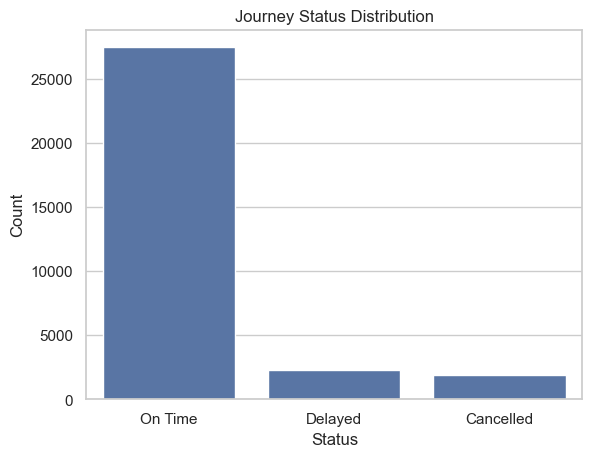

In [115]:
sns.countplot(x='Journey Status', data=df)
plt.title('Journey Status Distribution')
plt.ylabel('Count')
plt.xlabel('Status')
plt.show()

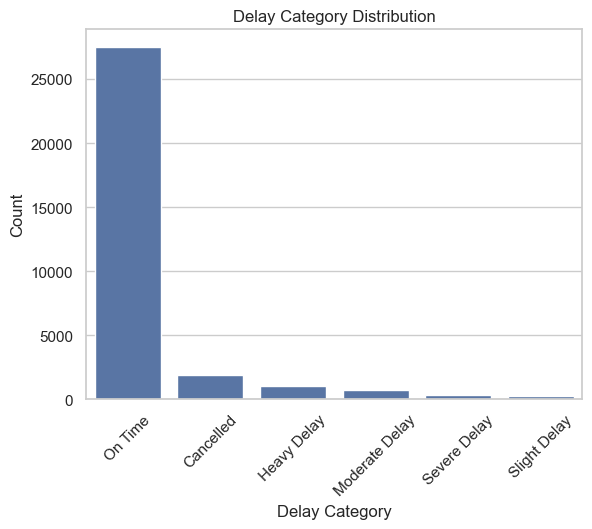

In [116]:
sns.countplot(x='Delay Category', data=df, order=df['Delay Category'].value_counts().index)
plt.title('Delay Category Distribution')
plt.ylabel('Count')
plt.xlabel('Delay Category')
plt.xticks(rotation=45)
plt.show()

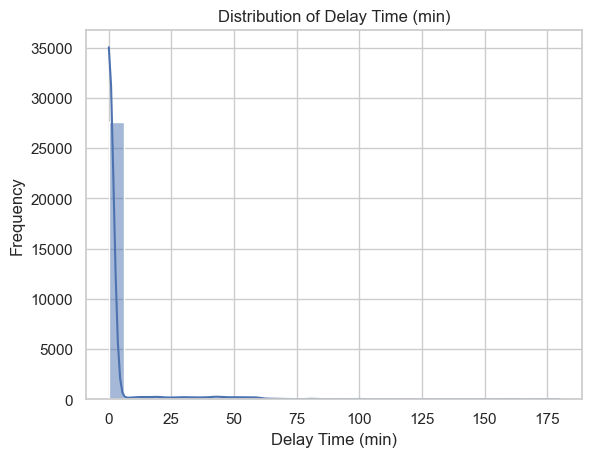

In [117]:
sns.histplot(df['Delay Time (min)'].dropna(), bins=30, kde=True)
plt.title('Distribution of Delay Time (min)')
plt.xlabel('Delay Time (min)')
plt.ylabel('Frequency')
plt.show()

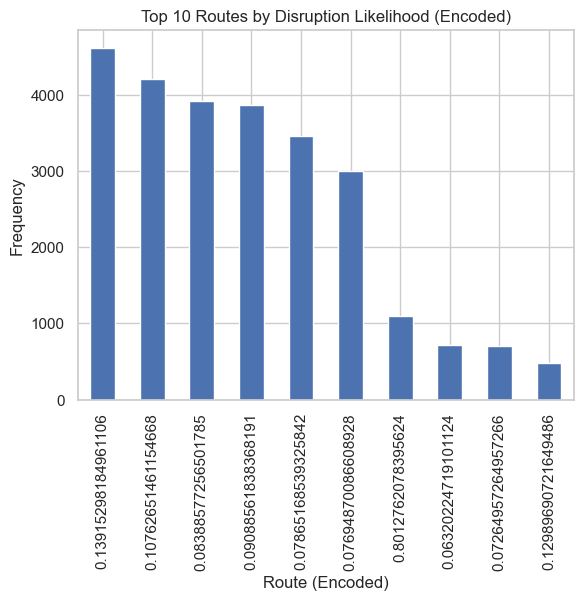

In [118]:
df['Route_encoded'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Routes by Disruption Likelihood (Encoded)')
plt.ylabel('Frequency')
plt.xlabel('Route (Encoded)')
plt.show()

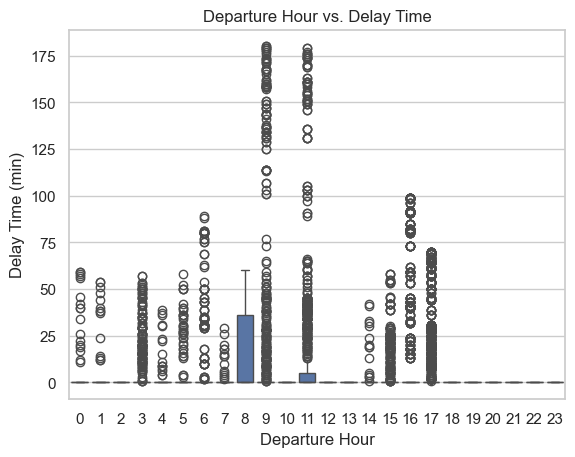

In [119]:
sns.boxplot(x='Departure Hour', y='Delay Time (min)', data=df)
plt.title('Departure Hour vs. Delay Time')
plt.ylabel('Delay Time (min)')
plt.xlabel('Departure Hour')
plt.show()

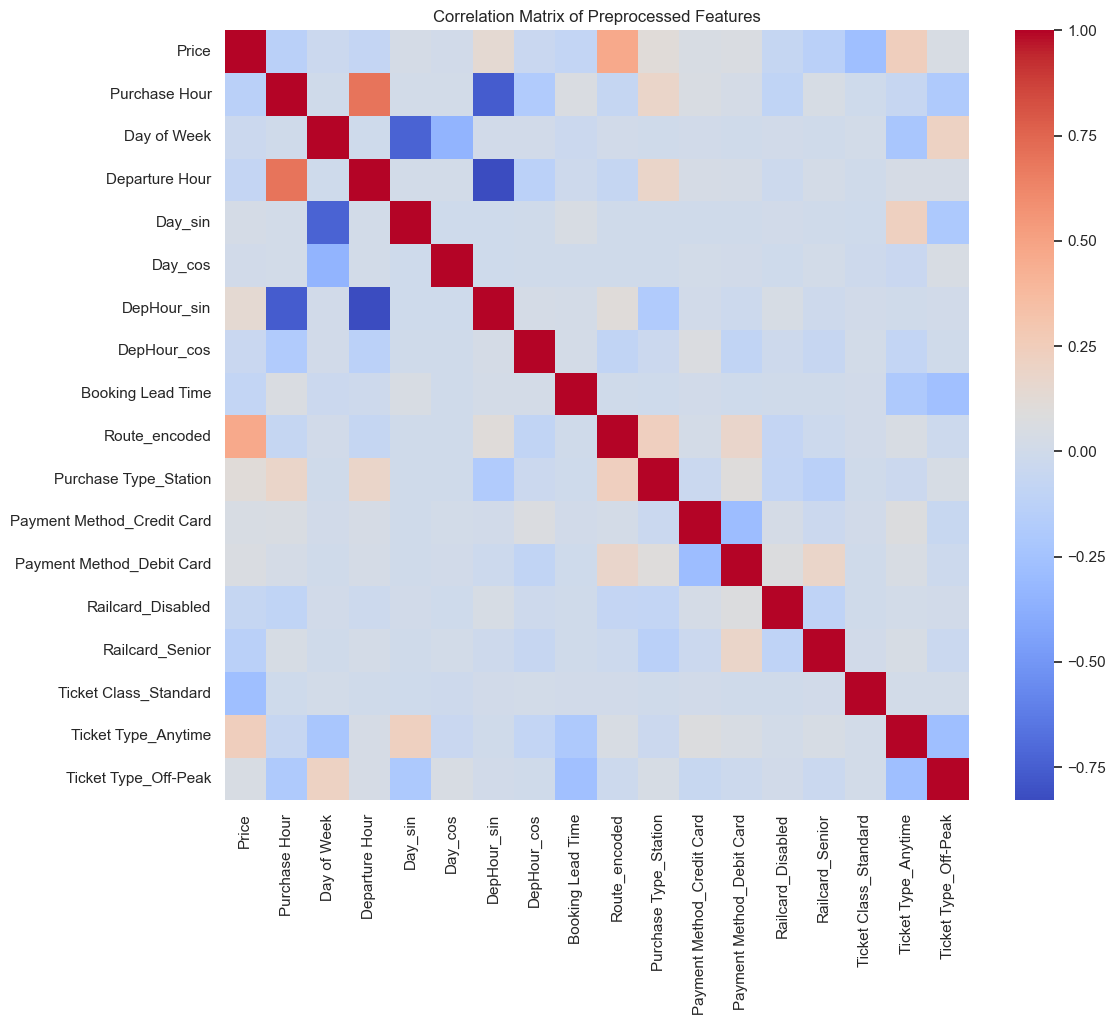

In [123]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix of Preprocessed Features")
plt.show()

## 2. Model Implementation & Evaluation

### 1. Import Required Libraries

In [120]:
import pandas as pd
import numpy as np

# Data splitting, preprocessing, and tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Oversampling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  

# Evaluation metrics
from sklearn.metrics import classification_report, matthews_corrcoef, accuracy_score, f1_score


### 2. Load Dataset and Prepare Features

In [122]:
# Load cleaned dataset
df = pd.read_csv("cleaned_railway.csv")

# Drop target, post-event, raw datetime/time, and high-cardinality text columns
X = df.drop(columns=[
    'Journey Status',               # Target (text)
    'Journey Status Binary',        # Target (binary)
    'Date of Purchase',             # Raw date (used in lead time, purchase hour)
    'Date of Journey',              # Raw date (used in day of week)
    'Time of Purchase',             # Raw time
    'Departure Time',               # Raw time
    'Arrival Time',                 # Raw time
    'Actual Arrival Time',          # Post-event (not available at prediction time)
    'Actual Arrival DT',            # Derived from actual arrival time
    'Delay Time (min)',             # Derived from actuals
    'Delay Category',               # Post-event label
    'Refund Request',               # Triggered by disruption
    'Reason for Delay',             # Only known after journey
    'Departure Station',            # Redundant with Route
    'Arrival Destination',          # Redundant with Route
    'Route',                        # High-cardinality, replaced by Route_encoded
    'Predicted Departure Time',     # Covered by Departure Hour
    'Predicted Arrival Time'        # Not needed directly
], errors='ignore')
X = pd.get_dummies(X, drop_first=True)

y = df['Journey Status Binary']
# Display X input Variables
print("Columns in X:")
for col in X.columns:
    print("-", col)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Columns in X:
- Price
- Purchase Hour
- Day of Week
- Departure Hour
- Day_sin
- Day_cos
- DepHour_sin
- DepHour_cos
- Booking Lead Time
- Route_encoded
- Purchase Type_Station
- Payment Method_Credit Card
- Payment Method_Debit Card
- Railcard_Disabled
- Railcard_Senior
- Ticket Class_Standard
- Ticket Type_Anytime
- Ticket Type_Off-Peak


### Models

#### Logistic Regression (SMOTE + Class Weights + Tuning)

In [ ]:
# Define pipeline
lr_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=500))
])

# Define parameter grid for tuning
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

# Perform Grid Search with cross-validation
grid_lr = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=param_grid_lr,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

# Fit and predict
grid_lr.fit(X_train, y_train)
y_pred_lr = grid_lr.predict(X_test)

# Print best parameters and evaluation metrics
print("Best Logistic Regression Parameters:", grid_lr.best_params_)
print("Logistic Regression (SMOTE + Weighting) with Tuning:")
print(classification_report(y_test, y_pred_lr))
print("MCC:", matthews_corrcoef(y_test, y_pred_lr))

Best Logistic Regression Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l1'}
Logistic Regression (SMOTE + Weighting) with Tuning:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      5497
           1       0.33      0.54      0.41       834

    accuracy                           0.79      6331
   macro avg       0.62      0.69      0.64      6331
weighted avg       0.84      0.79      0.81      6331

MCC: 0.30429088070249793


#### Random Forest (SMOTE + Weighting + Tuning)

In [ ]:
# Define pipeline
rf_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Define parameter grid for tuning
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Grid search with cross-validation
grid_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

# Fit and predict
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)

# Output results
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Random Forest (SMOTE + Weighting) with Tuning:")
print(classification_report(y_test, y_pred_rf))
print("MCC:", matthews_corrcoef(y_test, y_pred_rf))

Best Random Forest Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Random Forest (SMOTE + Weighting) with Tuning:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      5497
           1       0.55      0.64      0.59       834

    accuracy                           0.88      6331
   macro avg       0.75      0.78      0.76      6331
weighted avg       0.89      0.88      0.89      6331

MCC: 0.525581814160828


#### XGBoost (SMOTE + scale_pos_weight + Tuning)

In [ ]:
# Define pipeline
xgb_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=5,  # tune
        random_state=42
    ))
])

# Define parameter grid
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.1, 0.2]
}

# Grid search with cross-validation
grid_xgb = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid_xgb,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

# Fit and predict
grid_xgb.fit(X_train, y_train)
y_pred_xgb = grid_xgb.predict(X_test)

# Output results
print("Best XGBoost Parameters:", grid_xgb.best_params_)
print("XGBoost (SMOTE + scale_pos_weight) with Tuning:")
print(classification_report(y_test, y_pred_xgb))
print("MCC:", matthews_corrcoef(y_test, y_pred_xgb))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:02:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:02:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:02:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [10:02:14] WARN

Best XGBoost Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__n_estimators': 200}
XGBoost (SMOTE + scale_pos_weight) with Tuning:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5497
           1       0.40      0.76      0.52       834

    accuracy                           0.82      6331
   macro avg       0.68      0.79      0.70      6331
weighted avg       0.88      0.82      0.84      6331

MCC: 0.45565988122749473


#### Confusion Matrix

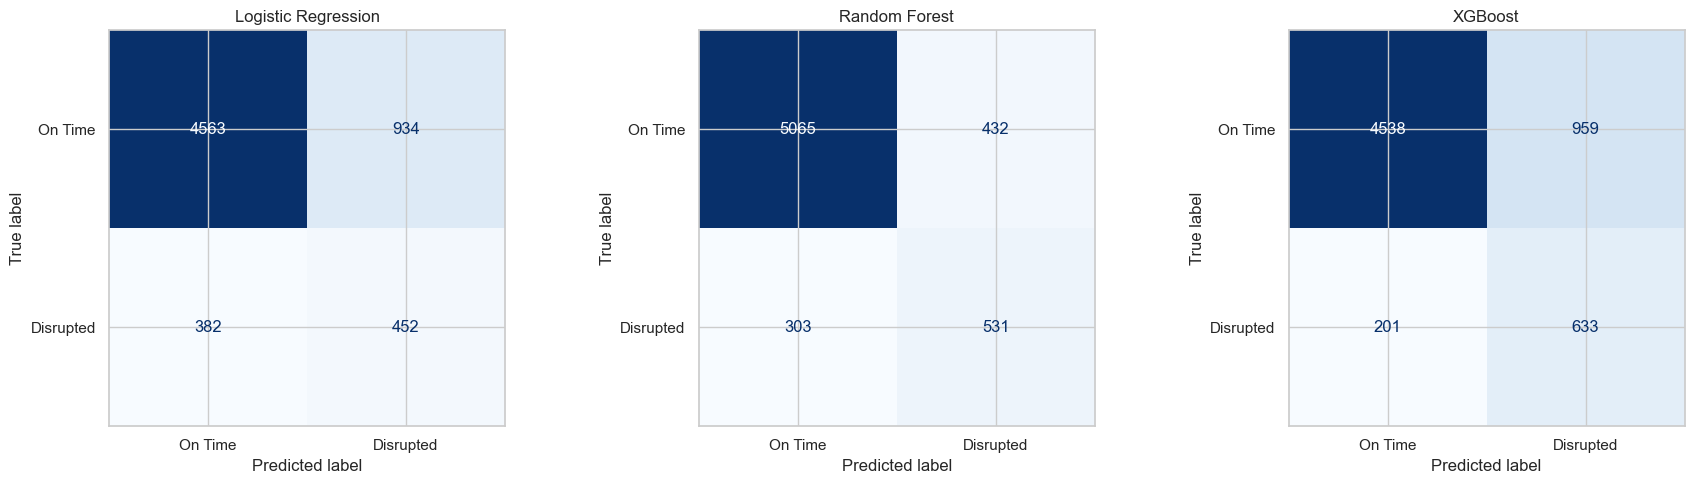

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrices = {
    "Logistic Regression": confusion_matrix(y_test, y_pred_lr),
    "Random Forest": confusion_matrix(y_test, y_pred_rf),
    "XGBoost": confusion_matrix(y_test, y_pred_xgb)
}

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, cm) in zip(axes, conf_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["On Time", "Disrupted"])
    disp.plot(ax=ax, colorbar=False, cmap="Blues", values_format='d')
    ax.set_title(name)

plt.tight_layout()
plt.savefig("Confusion_Matrix_Comparison.png")  # Save to file
plt.show()


#### Bar Chart: MCC, Macro F1, Disrupted Class F1

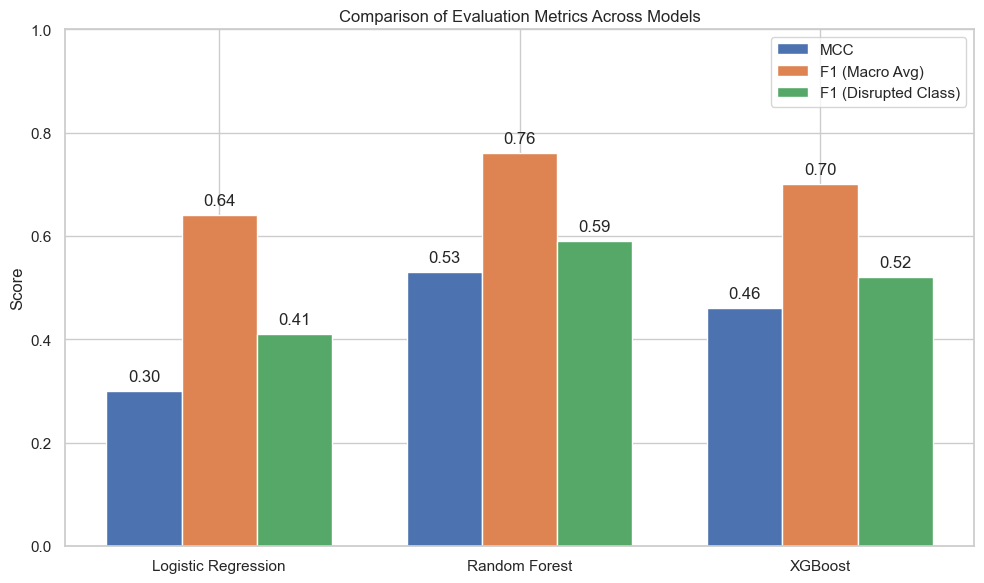

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics for each model (from your results)
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
mcc_scores = [0.30, 0.53, 0.46]
f1_macro = [0.64, 0.76, 0.70]
f1_disrupted = [0.41, 0.59, 0.52]

# Create the grouped bar chart
x = np.arange(len(models))  # label locations
width = 0.25  # width of each bar

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, mcc_scores, width, label='MCC')
bar2 = ax.bar(x, f1_macro, width, label='F1 (Macro Avg)')
bar3 = ax.bar(x + width, f1_disrupted, width, label='F1 (Disrupted Class)')

# Add labels, title, and legend
ax.set_ylabel('Score')
ax.set_title('Comparison of Evaluation Metrics Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.0)
ax.legend()

# Display scores on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.tight_layout()
plt.savefig("Model_Metric_Comparison.png")
plt.show()
